In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ds_salaries.csv')
df = df[df['experience_level'] == 'SE']

Câu hỏi 1: Ngành nào được chọn nhiều nhất, lương trung bình các ngành đó ở vị trí SE (senior)

/tmp/ipykernel_6083/3107139506.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=45, ha='right')


<Figure size 1200x600 with 0 Axes>

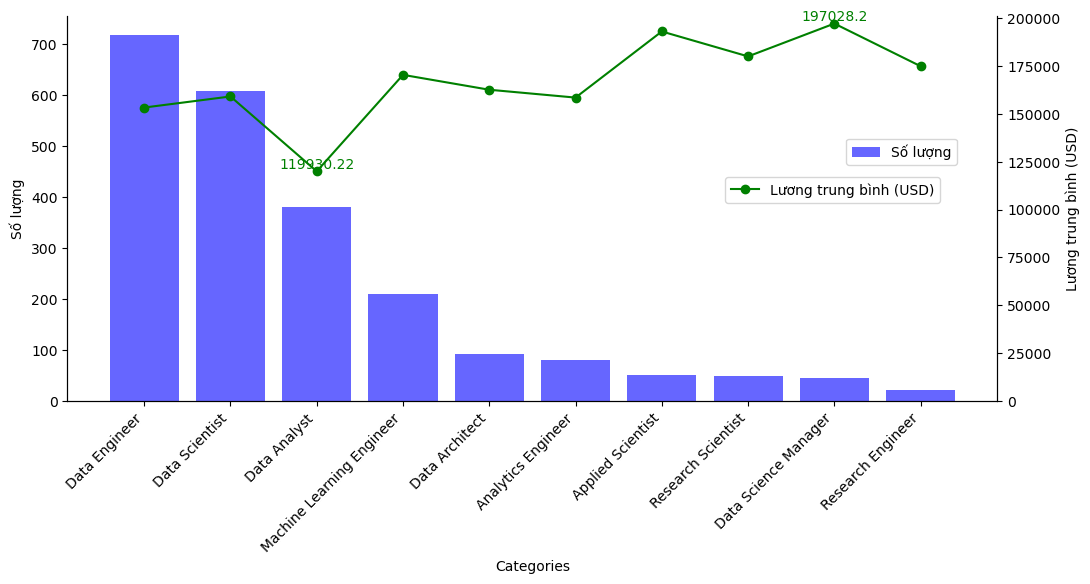

In [3]:
a = df['job_title'].value_counts().sort_index()
f = {key:[] for key in a.index}
for i in range(len(a)):
    f[a.index[i]].append(a.values[i])
for i, j in df.groupby('job_title')['salary_in_usd'].mean().items():
  f[i].append(j)
f = dict(sorted(f.items(), key=lambda item: item[1][0], reverse=True))
plt.figure(figsize=(12, 6))
y1 = []
y2 = []
for i in f.values():
  y1.append(i[0])
  y2.append(i[1])
y1 = y1[:10]
y2 = y2[:10]
x = list(f.keys())[:10]

fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.bar(x, y1, color='b', alpha=0.6, label='Số lượng')
ax1.set_xlabel('Categories')
ax1.set_ylabel('Số lượng', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticklabels(x, rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='g', marker='o', label='Lương trung bình (USD)')
ax2.set_ylabel('Lương trung bình (USD)', color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(bottom=0)

ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

for i, txt in enumerate(y2):
    if i in [2, 8]:
      ax2.text(i, y2[i], round(txt, 2), color='g', ha='center', va='bottom')

ax1.legend(loc='upper left', bbox_to_anchor=(0.83, 0.7)) 
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 0.6))

plt.show()